## Extracellular response of a passive cell to synaptic input: Plot LFP Heatmap
Adapted from LFPy Github  https://github.com/LFPy/LFPy/blob/master/examples/LFPy-example-02.ipynb

Modified by: Darshan Mandge, Open Brain Institute

Copyright (c) 2025 Open Brain Institute


Download the e-model folder from [here](https://openbraininstitute.sharepoint.com/:f:/s/OBI-Scientificstaff/Ei3QIGh3JFFHkRkY7LRyTpEBm8eUll7HGyusulkPavf5SA?e=7ihV8H) in OneDrive `OBI - Scientific staff -> Documents ->Data -> Analysis notebook data -> cadpyr_emodel`

For this example, the downloaded folder `cadpyr_emodel` is kept here `./Cellular/emodels` of this repository




The following notebook show the extracellular response of a synaptic input to a passive cADpyr neuron. To use it for a different model replace the morphology in the CellParameters dictionary.

In [8]:
#setting emodel_path
emodel_path = "../../cadpyr_emodel/"

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import LFPy

Create some dictionarys with parameters for cell, synapse and extracellular electrode:

In [10]:
cellParameters = {
    'morphology':f'{emodel_path}/C060114A5.asc',
    'tstart': -50,
    'tstop': 100,
    'dt': 2**-4,
    'passive': True,
}

synapseParameters = {
    'syntype': 'Exp2Syn',
    'e': 0.,
    'tau1': 0.5,
    'tau2': 2.0,
    'weight': 0.005,
    'record_current': True,
}

z = np.mgrid[-400:1201:100]
electrodeParameters = {
    'x': np.zeros(z.size),
    'y': np.zeros(z.size),
    'z': z,
    'sigma': 0.3,
}

Then, create the **`cell`**, **`synapse`** and **`electrode`** objects using the
**`LFPy.Cell`**, **`LFPy.Synapse`**, **`LFPy.RecExtElectrode`** classes.

In [11]:
cell = LFPy.Cell(**cellParameters)
cell.set_pos(x=-10, y=0, z=0)
# cell.set_rotation(x=4.98919, y=-4.33261, z=np.pi)
cell.set_rotation(x=4.98919, y=9.3, z=0)

synapse = LFPy.Synapse(cell,
                       idx = cell.get_closest_idx(z=800),
                       **synapseParameters)
synapse.set_spike_times(np.array([10, 30, 50]))
                        
electrode = LFPy.RecExtElectrode(cell, **electrodeParameters)

Run the simulation using **`cell.simulate()`** probing the extracellular potential with 
the additional keyword argument **`probes=[electrode]`**

In [12]:
cell.simulate(probes=[electrode])

Then plot the **somatic potential** and the **prediction** obtained using the `RecExtElectrode` instance 
(now accessible as `electrode.data`):

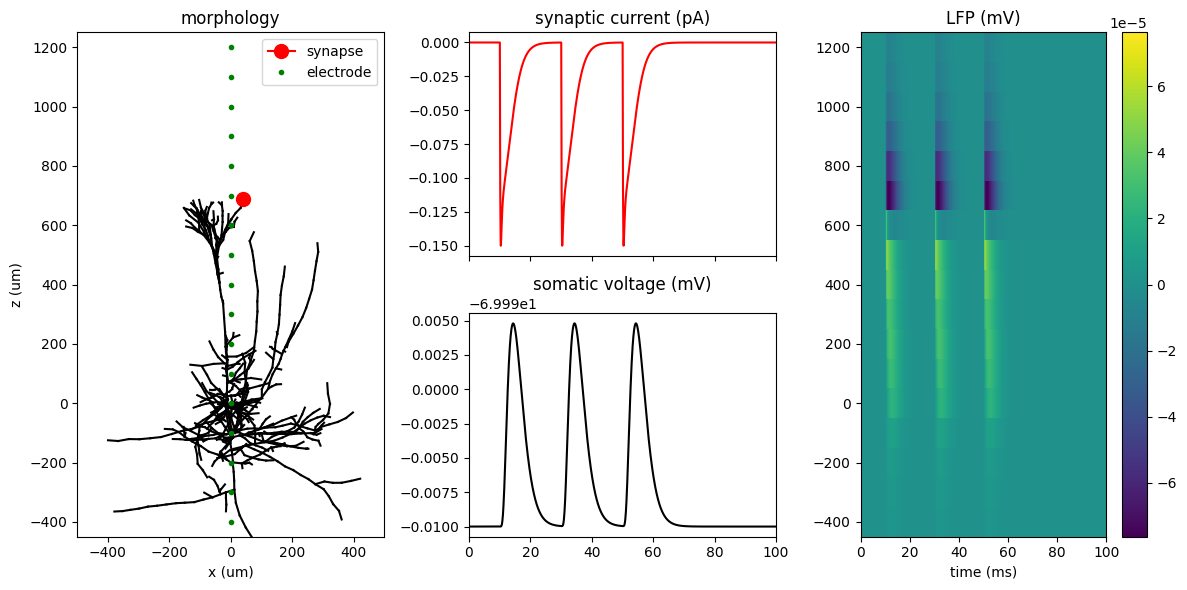

In [13]:
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(2, 3)

ax0 = fig.add_subplot(gs[:, 0])
ax0.plot(cell.x.T, cell.z.T, 'k')
ax0.plot(synapse.x, synapse.z, 
         color='r', marker='o', markersize=10,
         label='synapse')
ax0.plot(electrode.x, electrode.z, '.', color='g', 
         label='electrode')
ax0.axis([-500, 500, -450, 1250])
ax0.legend()
ax0.set_xlabel('x (um)')
ax0.set_ylabel('z (um)')
ax0.set_title('morphology')

ax1 = fig.add_subplot(gs[0, 1])
ax1.plot(cell.tvec, synapse.i, 'r')
ax1.set_title('synaptic current (pA)')
plt.setp(ax1.get_xticklabels(), visible=False)

ax2 = fig.add_subplot(gs[1, 1], sharex=ax1)
ax2.plot(cell.tvec, cell.somav, 'k')
ax2.set_title('somatic voltage (mV)')

ax3 = fig.add_subplot(gs[:, 2], sharey=ax0, sharex=ax1)
im = ax3.pcolormesh(cell.tvec, electrode.z, electrode.data,
                 vmin=-abs(electrode.data).max(), vmax=abs(electrode.data).max(),
                 shading='auto')
plt.colorbar(im)
ax3.set_title('LFP (mV)')
ax3.set_xlabel('time (ms)')
plt.tight_layout()

#savefig('LFPy-example-02.pdf', dpi=300)